In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from Excel file
data = pd.read_csv("passes.csv", delimiter=";")

# Group data by game_id
grouped = data.groupby('game_id')

# Initialize lists to store transformed data
game_ids = []
team1_scores = []
team2_scores = []
team1_won = []
team2_won = []

# Loop through each group (game) and transform the data
for game_id, group in grouped:
    game_ids.append(game_id)
    team1_score = group.iloc[0]['passing_quote']
    team2_score = group.iloc[1]['passing_quote']
    
    # Check if it's a draw
    if group.iloc[0]['winner'] == 'No' and group.iloc[1]['winner'] == 'No':
        team1_won.append('Draw')
        team2_won.append('Draw')
    else:
        if group.iloc[0]['winner'] == 'Yes':
            team1_won.append('Yes')
            team2_won.append('No')
        else:
            team1_won.append('No')
            team2_won.append('Yes')
    
    team1_scores.append(team1_score)
    team2_scores.append(team2_score)

# Create DataFrame with transformed data
data = pd.DataFrame({
    'game_id': game_ids,
    'team1_passing_rate': team1_scores,
    'team2_passing_rate': team2_scores,
    'team1_won': team1_won,
    'team2_won': team2_won
})

print(data.head(10))


   game_id  team1_passing_rate  team2_passing_rate team1_won team2_won
0       11                72.0                91.0        No       Yes
1       12                82.0                86.0       Yes        No
2       13                82.0                79.0       Yes        No
3       14                79.0                77.0        No       Yes
4       15                85.0                77.0      Draw      Draw
5       16                87.0                75.0       Yes        No
6       17                88.0                78.0       Yes        No
7       18                74.0                77.0       Yes        No
8       19                87.0                78.0       Yes        No
9       21                86.0                81.0       Yes        No


In [2]:
data_no_draws = data[(data['team1_won'] != 'Draw') & (data['team2_won'] != 'Draw')]
print(len(data_no_draws), len(data.count()))

115 5


In [3]:
# Filter out the draws
data_no_draws = data[(data['team1_won'] != 'Draw') & (data['team2_won'] != 'Draw')]

# Identify winning and losing passing rates
data_no_draws['winner_passing_rate'] = data_no_draws.apply(
    lambda row: row['team1_passing_rate'] if row['team1_won'] == 'Yes' else row['team2_passing_rate'], axis=1)
data_no_draws['loser_passing_rate'] = data_no_draws.apply(
    lambda row: row['team2_passing_rate'] if row['team1_won'] == 'Yes' else row['team1_passing_rate'], axis=1)

# Calculate the mean passing scores
mean_winner_passing_rate = data_no_draws['winner_passing_rate'].mean()
mean_loser_passing_rate = data_no_draws['loser_passing_rate'].mean()

# Print the results
print(f"Average Passing Rate for Winning Teams: {mean_winner_passing_rate}")
print(f"Average Passing Rate for Losing Teams: {mean_loser_passing_rate}")

# Comparison
if mean_winner_passing_rate > mean_loser_passing_rate:
    print("On average, the winning team has a higher passing rate than the losing team.")
else:
    print("On average, the winning team does not have a higher passing rate than the losing team.")


# Calculate the difference
data_no_draws['passing_rate_difference'] = data_no_draws['winner_passing_rate'] - data_no_draws['loser_passing_rate']

# Count positive and negative differences
positive_diff_count = (data_no_draws['passing_rate_difference'] > 0).sum()
negative_diff_count = (data_no_draws['passing_rate_difference'] < 0).sum()

# Print the results
print(f"Count of Positive Differences: {positive_diff_count}")
print(f"Count of Negative Differences: {negative_diff_count}")

# Analyze the results
if positive_diff_count > negative_diff_count:
    print("Winning teams are likely to have higher passing rates than losing teams.")
else:
    print("Winning teams are not likely to have higher passing rates than losing teams.")

Average Passing Rate for Winning Teams: 81.07894736842105
Average Passing Rate for Losing Teams: 79.26315789473684
On average, the winning team has a higher passing rate than the losing team.
Count of Positive Differences: 66
Count of Negative Differences: 47
Winning teams are likely to have higher passing rates than losing teams.


C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\566412763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_draws['winner_passing_rate'] = data_no_draws.apply(
C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\566412763.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_draws['loser_passing_rate'] = data_no_draws.apply(
C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\566412763.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [4]:
#question 2
# Calculate the passing rate difference
data['passing_rate_difference'] = data['team1_passing_rate'] - data['team2_passing_rate']

# Separate data into games with a winner and draws
games_with_winner = data[(data['team1_won'] == 'Yes') | (data['team2_won'] == 'Yes')]
games_with_draw = data[data['team1_won'] == 'Draw']

# Assign new columns for passing rate differences for clarity
games_with_winner['passing_rate_difference_winner'] = games_with_winner['passing_rate_difference']
games_with_draw['passing_rate_difference_draw'] = games_with_draw['passing_rate_difference']

# Calculate the average passing rate differences
avg_passing_rate_difference_winner = games_with_winner['passing_rate_difference_winner'].mean()
avg_passing_rate_difference_draw = games_with_draw['passing_rate_difference_draw'].mean()

# Print the average passing rate differences
print("Average Passing Rate Difference for Games with a Winner:", avg_passing_rate_difference_winner)
print("Average Passing Rate Difference for Games that Ended in a Draw:", avg_passing_rate_difference_draw)


Average Passing Rate Difference for Games with a Winner: 1.6754385964912282
Average Passing Rate Difference for Games that Ended in a Draw: 2.210526315789474


C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\3956530648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_with_winner['passing_rate_difference_winner'] = games_with_winner['passing_rate_difference']
C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\3956530648.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_with_draw['passing_rate_difference_draw'] = games_with_draw['passing_rate_difference']


C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\940550460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_draws['winner_passing_rate'] = data_no_draws.apply(
C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\940550460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_draws['loser_passing_rate'] = data_no_draws.apply(
C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\940550460.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is d

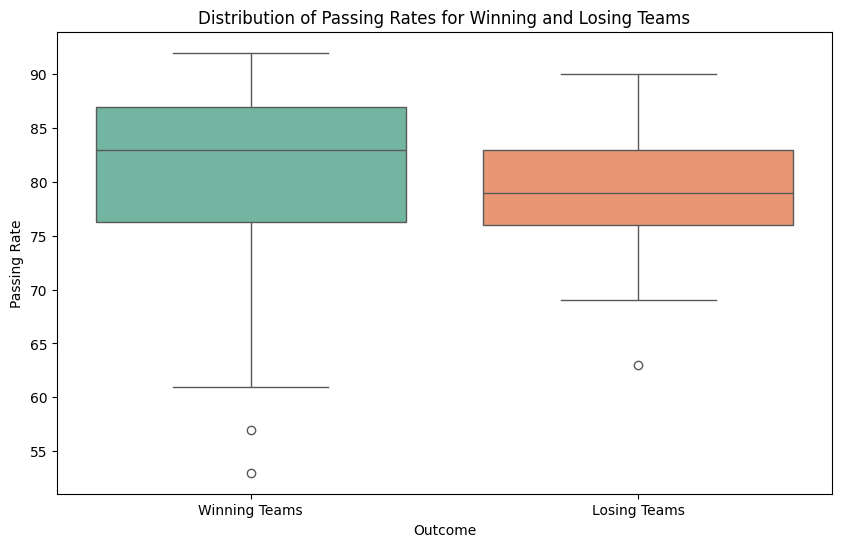

C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\940550460.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_draws['passing_rate_difference'] = data_no_draws['winner_passing_rate'] - data_no_draws['loser_passing_rate']
C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\940550460.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference', y='Count', data=diff_counts, palette='Set2')


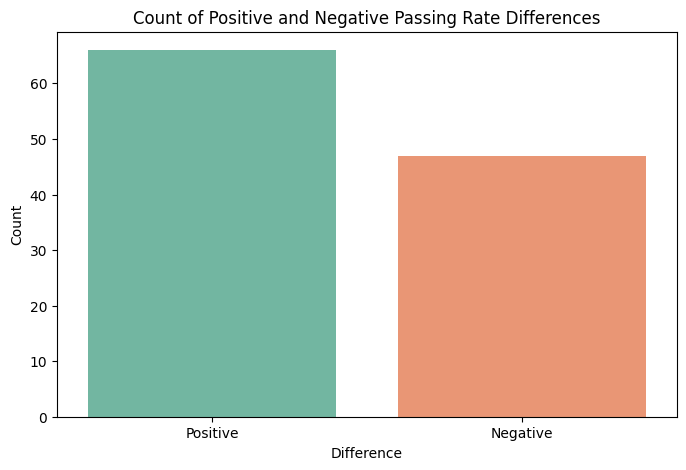

In [5]:
data_no_draws = data[(data['team1_won'] != 'Draw') & (data['team2_won'] != 'Draw')]

# Identify winning and losing passing rates
data_no_draws['winner_passing_rate'] = data_no_draws.apply(
    lambda row: row['team1_passing_rate'] if row['team1_won'] == 'Yes' else row['team2_passing_rate'], axis=1)
data_no_draws['loser_passing_rate'] = data_no_draws.apply(
    lambda row: row['team2_passing_rate'] if row['team1_won'] == 'Yes' else row['team1_passing_rate'], axis=1)

# Prepare data for box plot
passing_rate_data = pd.melt(data_no_draws[['winner_passing_rate', 'loser_passing_rate']], 
                            var_name='Outcome', value_name='Passing Rate')

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Passing Rate', data=passing_rate_data, palette='Set2')
plt.title('Distribution of Passing Rates for Winning and Losing Teams')
plt.xlabel('Outcome')
plt.ylabel('Passing Rate')
plt.xticks([0, 1], ['Winning Teams', 'Losing Teams'])
plt.show()

# Calculate the differences
data_no_draws['passing_rate_difference'] = data_no_draws['winner_passing_rate'] - data_no_draws['loser_passing_rate']

# Count positive and negative differences
positive_diff_count = (data_no_draws['passing_rate_difference'] > 0).sum()
negative_diff_count = (data_no_draws['passing_rate_difference'] < 0).sum()

# Prepare data for bar chart
diff_counts = pd.DataFrame({'Difference': ['Positive', 'Negative'],
                            'Count': [positive_diff_count, negative_diff_count]})

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Difference', y='Count', data=diff_counts, palette='Set2')
plt.title('Count of Positive and Negative Passing Rate Differences')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.show()

In [6]:
# # Calculate average passing rate difference for games with a winner (either team 1 or team 2)
# avg_passing_rate_difference_winner = data[(data['team1_won'] == 'Yes') | (data['team2_won'] == 'Yes')]['passing_rate_difference_winner'].mean()

# # Calculate average passing rate difference for games that ended in a draw
# avg_passing_rate_difference_draw = data[data['team1_won'] == 'Draw']['passing_rate_difference_draw'].mean()

# # Print average passing rate differences
# print("Average Passing Rate Difference for Games with a Winner:", avg_passing_rate_difference_winner)
# print("Average Passing Rate Difference for Games that Ended in a Draw:", avg_passing_rate_difference_draw)


#question 2
# Calculate the passing rate difference
data['passing_rate_difference'] = data['team1_passing_rate'] - data['team2_passing_rate']

# Separate data into games with a winner and draws
games_with_winner = data[(data['team1_won'] == 'Yes') | (data['team2_won'] == 'Yes')]
games_with_draw = data[data['team1_won'] == 'Draw']

# Assign new columns for passing rate differences for clarity
games_with_winner['passing_rate_difference_winner'] = games_with_winner['passing_rate_difference']
games_with_draw['passing_rate_difference_draw'] = games_with_draw['passing_rate_difference']

# Calculate the average passing rate differences
avg_passing_rate_difference_winner = games_with_winner['passing_rate_difference_winner'].mean()
avg_passing_rate_difference_draw = games_with_draw['passing_rate_difference_draw'].mean()

# Print the average passing rate differences
print("Average Passing Rate Difference for Games with a Winner:", avg_passing_rate_difference_winner)
print("Average Passing Rate Difference for Games that Ended in a Draw:", avg_passing_rate_difference_draw)


Average Passing Rate Difference for Games with a Winner: 1.6754385964912282
Average Passing Rate Difference for Games that Ended in a Draw: 2.210526315789474


C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\285620229.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_with_winner['passing_rate_difference_winner'] = games_with_winner['passing_rate_difference']
C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\285620229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_with_draw['passing_rate_difference_draw'] = games_with_draw['passing_rate_difference']


In [7]:
data.head()

,game_id,team1_passing_rate,team2_passing_rate,team1_won,team2_won,passing_rate_difference
0,11,72.0,91.0,No,Yes,-19.0
1,12,82.0,86.0,Yes,No,-4.0
2,13,82.0,79.0,Yes,No,3.0
3,14,79.0,77.0,No,Yes,2.0
4,15,85.0,77.0,Draw,Draw,8.0


C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\2394499649.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Team_Type', y='Passing Rate', data=combined_data, palette='Set2')


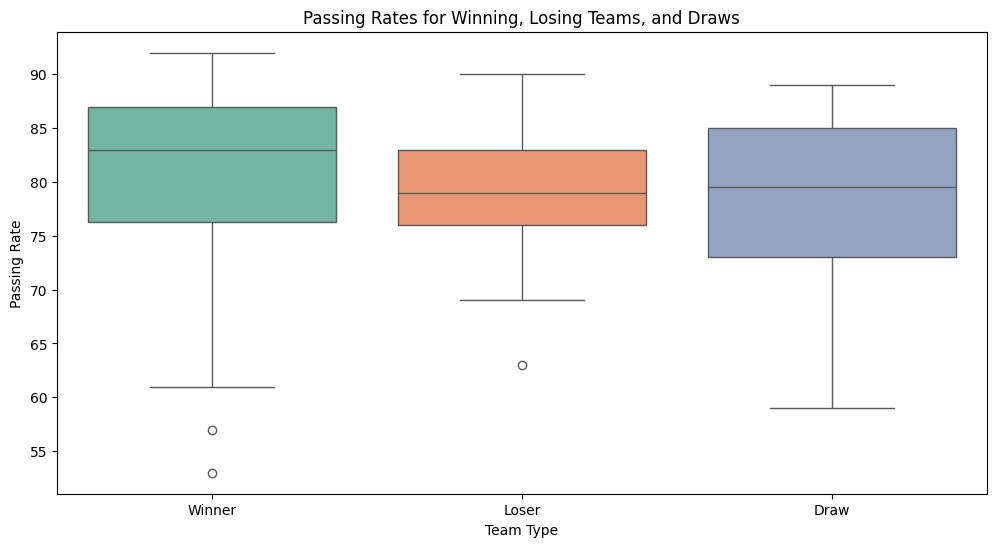

C:\Users\YASHASWINI SANDEEP\AppData\Local\Temp\ipykernel_23560\2394499649.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Passing Rate Difference', data=avg_pass_rate_data, palette='Set2')


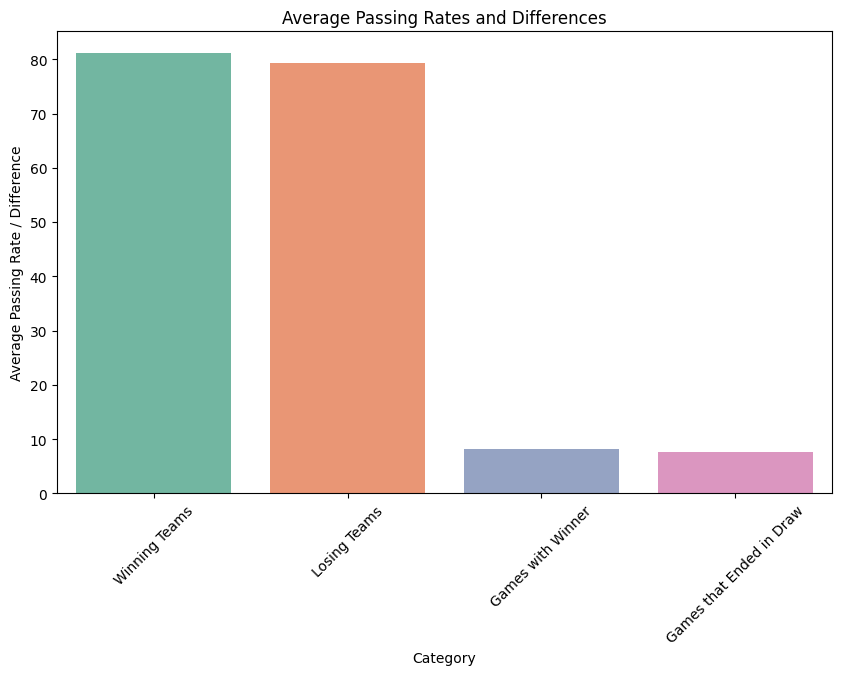

In [8]:


# Identify winning and losing teams and calculate passing rate differences
data['winner_passing_rate'] = data.apply(lambda row: row['team1_passing_rate'] if row['team1_won'] == 'Yes' else (row['team2_passing_rate'] if row['team2_won'] == 'Yes' else None), axis=1)
data['loser_passing_rate'] = data.apply(lambda row: row['team2_passing_rate'] if row['team1_won'] == 'Yes' else (row['team1_passing_rate'] if row['team2_won'] == 'Yes' else None), axis=1)
data['passing_rate_difference'] = abs(data['team1_passing_rate'] - data['team2_passing_rate'])

# Filter data for games with winners and draws
games_with_winner = data.dropna(subset=['winner_passing_rate', 'loser_passing_rate'])
games_with_draw = data[(data['team1_won'] == 'Draw') & (data['team2_won'] == 'Draw')]

# Calculate the average passing rate difference for both types of games
avg_passing_rate_difference_winner = games_with_winner['passing_rate_difference'].mean()
avg_passing_rate_difference_draw = games_with_draw['passing_rate_difference'].mean()

# Combine data for box plot
combined_data = pd.concat([
    games_with_winner[['winner_passing_rate']].rename(columns={'winner_passing_rate': 'Passing Rate'}).assign(Team_Type='Winner'),
    games_with_winner[['loser_passing_rate']].rename(columns={'loser_passing_rate': 'Passing Rate'}).assign(Team_Type='Loser'),
    games_with_draw[['team1_passing_rate']].rename(columns={'team1_passing_rate': 'Passing Rate'}).assign(Team_Type='Draw'),
    games_with_draw[['team2_passing_rate']].rename(columns={'team2_passing_rate': 'Passing Rate'}).assign(Team_Type='Draw')
])

# Box Plot for Passing Rates
plt.figure(figsize=(12, 6))
sns.boxplot(x='Team_Type', y='Passing Rate', data=combined_data, palette='Set2')
plt.title('Passing Rates for Winning, Losing Teams, and Draws')
plt.xlabel('Team Type')
plt.ylabel('Passing Rate')
plt.show()

# Combine data for bar chart
avg_pass_rate_data = pd.DataFrame({
    'Category': ['Winning Teams', 'Losing Teams', 'Games with Winner', 'Games that Ended in Draw'],
    'Average Passing Rate Difference': [
        games_with_winner['winner_passing_rate'].mean(),
        games_with_winner['loser_passing_rate'].mean(),
        avg_passing_rate_difference_winner,
        avg_passing_rate_difference_draw
    ]
})

# Bar Chart for Average Passing Rates and Differences
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Passing Rate Difference', data=avg_pass_rate_data, palette='Set2')
plt.title('Average Passing Rates and Differences')
plt.xlabel('Category')
plt.ylabel('Average Passing Rate / Difference')
plt.xticks(rotation=45)
plt.show()


In [9]:
data.columns
data.head()

,game_id,team1_passing_rate,team2_passing_rate,team1_won,team2_won,passing_rate_difference,winner_passing_rate,loser_passing_rate
0,11,72.0,91.0,No,Yes,19.0,91.0,72.0
1,12,82.0,86.0,Yes,No,4.0,82.0,86.0
2,13,82.0,79.0,Yes,No,3.0,82.0,79.0
3,14,79.0,77.0,No,Yes,2.0,77.0,79.0
4,15,85.0,77.0,Draw,Draw,8.0,NaN,NaN


In [10]:
import pandas as pd
from scipy import stats



# Identify winning and losing teams and calculate passing rate differences
data['winner_passing_rate'] = data.apply(lambda row: row['team1_passing_rate'] if row['team1_won'] == 'Yes' else (row['team2_passing_rate'] if row['team2_won'] == 'Yes' else None), axis=1)
data['loser_passing_rate'] = data.apply(lambda row: row['team2_passing_rate'] if row['team1_won'] == 'Yes' else (row['team1_passing_rate'] if row['team2_won'] == 'Yes' else None), axis=1)

# Filter data for games with winners and draws
games_with_winner = data.dropna(subset=['winner_passing_rate', 'loser_passing_rate'])
games_with_draw = data[data['team1_won'] == 'Draw']

# Extract relevant data for testing
winner_passing_rates = games_with_winner['winner_passing_rate']
loser_passing_rates = games_with_winner['loser_passing_rate']

# T-test to compare passing rates between winners and losers
t_stat1, p_val1 = stats.ttest_ind(winner_passing_rates, loser_passing_rates, alternative='greater')

# Print results
print("Winner vs. Loser T-test:")
print(f"T-statistic: {t_stat1}")
print(f"P-value: {p_val1}\n")


Winner vs. Loser T-test:
T-statistic: 2.0278728823820784
P-value: 0.02187336522457399



In [11]:
data.head(10)

,game_id,team1_passing_rate,team2_passing_rate,team1_won,team2_won,passing_rate_difference,winner_passing_rate,loser_passing_rate
0,11,72.0,91.0,No,Yes,19.0,91.0,72.0
1,12,82.0,86.0,Yes,No,4.0,82.0,86.0
2,13,82.0,79.0,Yes,No,3.0,82.0,79.0
3,14,79.0,77.0,No,Yes,2.0,77.0,79.0
4,15,85.0,77.0,Draw,Draw,8.0,NaN,NaN
5,16,87.0,75.0,Yes,No,12.0,87.0,75.0
6,17,88.0,78.0,Yes,No,10.0,88.0,78.0
7,18,74.0,77.0,Yes,No,3.0,74.0,77.0
8,19,87.0,78.0,Yes,No,9.0,87.0,78.0
9,21,86.0,81.0,Yes,No,5.0,86.0,81.0
